In [138]:
import pandas as pd
checkpoint = pd.read_csv("C:/Users/arush/Downloads/Terapixel_data/application-checkpoints.csv")
gpu=pd.read_csv("C:/Users/arush/Downloads/Terapixel_data/gpu.csv")
task=pd.read_csv("C:/Users/arush/Downloads/Terapixel_data/task-x-y.csv")

In [139]:
!pip install -U pandasql

In [140]:
from sklearn import datasets
import seaborn as sns
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [141]:
checkpoint.head(10).sort_values(by=['taskId','timestamp'])

,timestamp,hostname,eventName,eventType,jobId,taskId
1,2018-11-08T07:42:29.842Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
2,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
3,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Render,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
4,2018-11-08T07:43:13.957Z,0d56a730076643d585f77e00d2d8521a00000N,TotalRender,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
5,2018-11-08T07:43:56.239Z,0d56a730076643d585f77e00d2d8521a00000N,Render,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,3dd4840c-47f2-4dcc-a775-df2ef6498d71
6,2018-11-08T07:43:56.239Z,0d56a730076643d585f77e00d2d8521a00000N,Uploading,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,3dd4840c-47f2-4dcc-a775-df2ef6498d71
7,2018-11-08T07:43:57.223Z,0d56a730076643d585f77e00d2d8521a00000N,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,3dd4840c-47f2-4dcc-a775-df2ef6498d71
0,2018-11-08T07:41:55.921Z,0d56a730076643d585f77e00d2d8521a00000N,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,b47f0263-ba1c-48a7-8d29-4bf021b72043
8,2018-11-08T07:44:47.555Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,c9e249d8-52ed-40c6-8713-b5cbf02ea87e
9,2018-11-08T07:45:20.713Z,0d56a730076643d585f77e00d2d8521a00000N,Render,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,c9e249d8-52ed-40c6-8713-b5cbf02ea87e


In [142]:
task.head()

,taskId,jobId,x,y,level
0,00004e77-304c-4fbd-88a1-1346ef947567,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,116,178,12
1,0002afb5-d05e-4da9-bd53-7b6dc19ea6d4,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,190,12
2,0003c380-4db9-49fb-8e1c-6f8ae466ad85,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,86,12
3,000993b6-fc88-489d-a4ca-0a44fd800bd3,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,235,11,12
4,000b158b-0ba3-4dca-bf5b-1b3bd5c28207,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,171,53,12


In [143]:
q_start_stop='select a.hostname,a.taskId, a.jobId, a.eventName,a.eventType as Start,a.timestamp as Start_Time,b.eventType as Stop,b.timestamp as Stop_Time from checkpoint a INNER JOIN checkpoint b on a.taskId=b.taskId and a.eventName=b.eventName where a.timestamp<b.timestamp order by a.eventName;'
q_start_stop=pysqldf(q_start_stop)
q_start_stop.head()

,hostname,taskId,jobId,eventName,Start,Start_Time,Stop,Stop_Time
0,0d56a730076643d585f77e00d2d8521a00000N,20fb9fcf-a927-4a4b-a64c-70258b66b42d,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Render,START,2018-11-08T07:42:29.845Z,STOP,2018-11-08T07:43:10.965Z
1,0d56a730076643d585f77e00d2d8521a00000N,e7776af5-510d-4ec4-b2d3-222b5df3307b,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Render,START,2018-11-08T08:14:53.364Z,STOP,2018-11-08T08:15:32.380Z
2,0d56a730076643d585f77e00d2d8521a00000N,339d3724-dcf6-41f1-b30d-c71107befcee,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Render,START,2018-11-08T08:21:58.845Z,STOP,2018-11-08T08:22:38.257Z
3,0d56a730076643d585f77e00d2d8521a00000N,8d663dcb-7a8c-42e9-93de-21d0e6a508f5,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Render,START,2018-11-08T07:48:06.922Z,STOP,2018-11-08T07:48:47.993Z
4,0d56a730076643d585f77e00d2d8521a00000N,244fd4f0-104e-4512-93b4-d9f83e2d0d9c,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Render,START,2018-11-08T07:59:32.698Z,STOP,2018-11-08T08:00:11.667Z


In [144]:
q_start_stop["Start_Time"]=q_start_stop["Start_Time"].astype('datetime64')
q_start_stop["Stop_Time"]=q_start_stop["Stop_Time"].astype('datetime64')
q_start_stop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332670 entries, 0 to 332669
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   hostname    332670 non-null  object        
 1   taskId      332670 non-null  object        
 2   jobId       332670 non-null  object        
 3   eventName   332670 non-null  object        
 4   Start       332670 non-null  object        
 5   Start_Time  332670 non-null  datetime64[ns]
 6   Stop        332670 non-null  object        
 7   Stop_Time   332670 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(6)
memory usage: 20.3+ MB


In [145]:
q_start_stop['Time_taken']=(q_start_stop['Stop_Time']-q_start_stop['Start_Time']).dt.total_seconds()
q_start_stop.head()

,hostname,taskId,jobId,eventName,Start,Start_Time,Stop,Stop_Time,Time_taken
0,0d56a730076643d585f77e00d2d8521a00000N,20fb9fcf-a927-4a4b-a64c-70258b66b42d,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Render,START,2018-11-08 07:42:29.845,STOP,2018-11-08 07:43:10.965,41.120
1,0d56a730076643d585f77e00d2d8521a00000N,e7776af5-510d-4ec4-b2d3-222b5df3307b,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Render,START,2018-11-08 08:14:53.364,STOP,2018-11-08 08:15:32.380,39.016
2,0d56a730076643d585f77e00d2d8521a00000N,339d3724-dcf6-41f1-b30d-c71107befcee,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Render,START,2018-11-08 08:21:58.845,STOP,2018-11-08 08:22:38.257,39.412
3,0d56a730076643d585f77e00d2d8521a00000N,8d663dcb-7a8c-42e9-93de-21d0e6a508f5,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Render,START,2018-11-08 07:48:06.922,STOP,2018-11-08 07:48:47.993,41.071
4,0d56a730076643d585f77e00d2d8521a00000N,244fd4f0-104e-4512-93b4-d9f83e2d0d9c,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Render,START,2018-11-08 07:59:32.698,STOP,2018-11-08 08:00:11.667,38.969


In [168]:
q_start_stop[q_start_stop['eventName']=='Saving Config']

,hostname,taskId,jobId,eventName,Start,Start_Time,Stop,Stop_Time,Time_taken
66534,0d56a730076643d585f77e00d2d8521a00000N,20fb9fcf-a927-4a4b-a64c-70258b66b42d,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Saving Config,START,2018-11-08 07:42:29.842,STOP,2018-11-08 07:42:29.845,0.003
66535,0d56a730076643d585f77e00d2d8521a00000N,c9e249d8-52ed-40c6-8713-b5cbf02ea87e,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Saving Config,START,2018-11-08 07:44:47.555,STOP,2018-11-08 07:44:47.557,0.002
66536,0d56a730076643d585f77e00d2d8521a00000N,fb8b9faa-be63-426c-9742-be30e5298f5b,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Saving Config,START,2018-11-08 08:03:09.698,STOP,2018-11-08 08:03:09.701,0.003
66537,0d56a730076643d585f77e00d2d8521a00000N,674ef19f-b3cb-4aa5-8980-f37cbbca324d,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Saving Config,START,2018-11-08 08:03:46.513,STOP,2018-11-08 08:03:46.515,0.002
66538,0d56a730076643d585f77e00d2d8521a00000N,a3f07861-f633-4c6d-9c12-7fa9a2610524,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Saving Config,START,2018-11-08 08:17:45.406,STOP,2018-11-08 08:17:45.408,0.002
...,...,...,...,...,...,...,...,...,...
133063,b9a1fa7ae2f74eb68f25f607980f97d700000V,b8f12d97-bfcd-4724-b617-b15db8192e42,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Saving Config,START,2018-11-08 08:29:23.079,STOP,2018-11-08 08:29:23.082,0.003
133064,04dc4e9647154250beeee51b866b071500000G,a86081e9-57a0-44f6-8694-5a5a8b9fedc1,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Saving Config,START,2018-11-08 08:29:21.018,STOP,2018-11-08 08:29:21.020,0.002
133065,0d56a730076643d585f77e00d2d8521a00000X,4b87d4d9-16a2-4331-b73c-b444eb5415d4,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Saving Config,START,2018-11-08 08:29:23.052,STOP,2018-11-08 08:29:23.055,0.003
133066,0745914f4de046078517041d70b22fe700000I,8261c0ff-03d6-48b3-a50f-da41cb3291fd,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Saving Config,START,2018-11-08 08:29:23.079,STOP,2018-11-08 08:29:23.081,0.002


In [147]:
q_avg_time_taken="select eventName,AVG(Time_Taken) from q_start_stop where eventName not like '%TotalRender%' group by eventName;"
q_avg_time_taken=pysqldf(q_avg_time_taken)
q_avg_time_taken

,eventName,AVG(Time_Taken)
0,Render,41.227902
1,Saving Config,0.002476
2,Tiling,0.973204
3,Uploading,1.393523


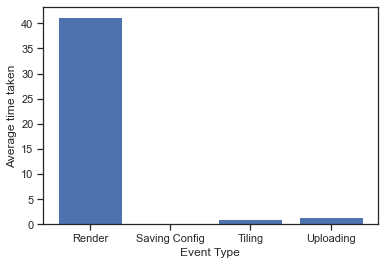

In [148]:
import matplotlib.pyplot as plt
plt.bar(q_avg_time_taken['eventName'],q_avg_time_taken['AVG(Time_Taken)'])
plt.xlabel("Event Type")
plt.ylabel("Average time taken")
plt.show()

In [149]:
gpu.head(20).sort_values(by=['hostname'])

,timestamp,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
7,2018-11-08T08:27:11.089Z,0d56a730076643d585f77e00d2d8521a00000Q,325117171574,GPU-d84a1024-9381-c725-3b85-dd7143e64c35,27.18,35,0,0
6,2018-11-08T08:27:10.737Z,265232c5f6814768aeefa66a7bec6ff600000G,323617043049,GPU-a9683b6b-2830-fe2f-19af-a9e945ada0d5,121.09,41,91,47
16,2018-11-08T08:27:10.917Z,265232c5f6814768aeefa66a7bec6ff600000O,323617020120,GPU-b7e2dffb-a8da-83e5-686e-ef892e27409d,93.58,42,92,41
5,2018-11-08T08:27:10.209Z,265232c5f6814768aeefa66a7bec6ff600000R,323617020227,GPU-71765422-12ec-9ebe-39c7-06b9d8c17a95,120.50,43,88,40
8,2018-11-08T08:27:10.912Z,35bd84d72aca403b8129a7d652cc275000000E,323617020105,GPU-02fa6318-4397-de7b-336e-63196cf3b638,139.63,43,93,56
9,2018-11-08T08:27:10.875Z,4a79b6d2616049edbf06c6aa58ab426a000008,325017019905,GPU-0e6e345c-ba46-d455-b6a1-ba8a2cfc62c0,77.87,36,90,40
13,2018-11-08T08:27:10.955Z,4c72fae95b9147189a0559269a6953ff00000P,325117172543,GPU-159afbfa-9b2e-ec8c-aff4-a920bd54b8ba,96.04,39,90,48
15,2018-11-08T08:27:10.359Z,4c72fae95b9147189a0559269a6953ff00000X,325117063055,GPU-21dc01c9-a613-e5ed-d2f9-e4320a7517e3,146.32,43,93,52
14,2018-11-08T08:27:10.593Z,6139a35676de44d6b61ec247f0ed865700000J,325217086436,GPU-221a4b6f-3450-7e8f-2347-136821d23101,94.27,42,92,46
12,2018-11-08T08:27:10.949Z,83ea61ac1ef54f27a3bf7bd0f41ecaa700000J,323617020883,GPU-8792a29c-529e-1837-1806-c669cd9b1960,42.44,41,0,0


In [150]:
gpu['hostname'].value_counts()

4a79b6d2616049edbf06c6aa58ab426a00000Y    3002
4ad946d4435c42dabb5073531ea4f315000001    3002
35bd84d72aca403b8129a7d652cc2750000005    3002
0745914f4de046078517041d70b22fe7000005    3002
95b4ae6d890e4c46986d91d7ac4bf082000010    2992
                                          ... 
0d56a730076643d585f77e00d2d8521a00000I    1492
0d56a730076643d585f77e00d2d8521a00000F    1492
0d56a730076643d585f77e00d2d8521a00000N    1492
0d56a730076643d585f77e00d2d8521a00000S    1491
0d56a730076643d585f77e00d2d8521a000012    1489
Name: hostname, Length: 1024, dtype: int64

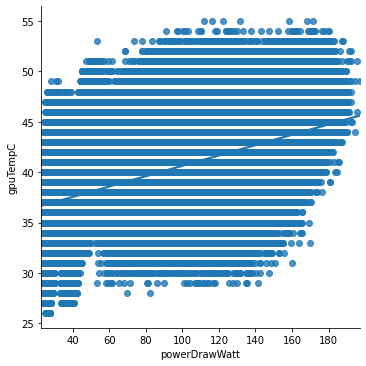

In [25]:
plt.rcParams['figure.figsize'] = [10, 6]
sns.lmplot(x="powerDrawWatt",y="gpuTempC", data=gpu)
plt.show()

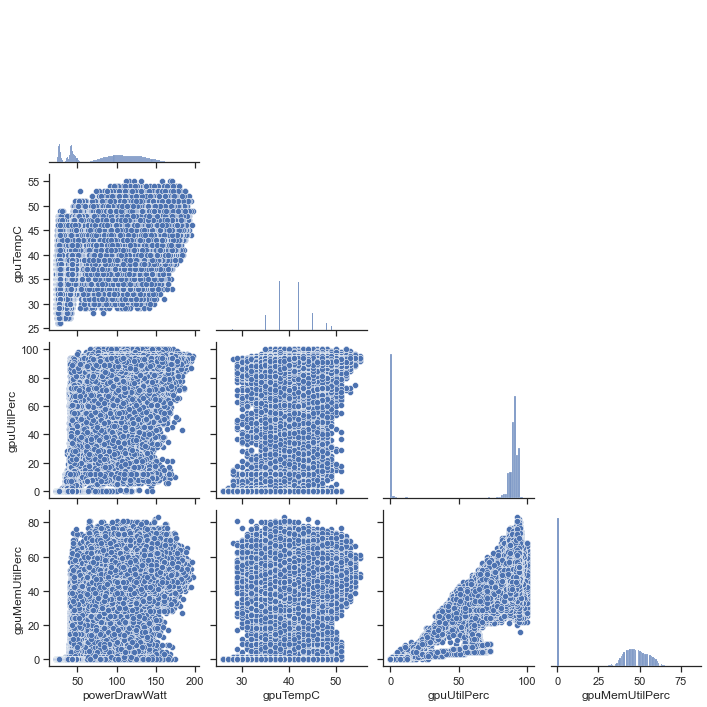

In [62]:
sns.pairplot(
    gpu,
    x_vars=["powerDrawWatt","gpuTempC","gpuUtilPerc","gpuMemUtilPerc"],
    y_vars=["powerDrawWatt","gpuTempC","gpuUtilPerc","gpuMemUtilPerc"],corner=True
)
plt.show()

In [44]:
startstop_task_merge="select ss.hostname,ss.taskId,ss.jobId, ss.eventName,ss.Time_taken,t.x,t.y from task t INNER JOIN q_start_stop ss on t.taskId=ss.taskId;"
startstop_task_merge=pysqldf(startstop_task_merge)
startstop_task_merge

,hostname,taskId,jobId,eventName,Time_taken,x,y
0,0745914f4de046078517041d70b22fe7000001,00004e77-304c-4fbd-88a1-1346ef947567,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Render,30.240,116,178
1,0745914f4de046078517041d70b22fe7000001,00004e77-304c-4fbd-88a1-1346ef947567,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Saving Config,0.002,116,178
2,0745914f4de046078517041d70b22fe7000001,00004e77-304c-4fbd-88a1-1346ef947567,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Tiling,0.975,116,178
3,0745914f4de046078517041d70b22fe7000001,00004e77-304c-4fbd-88a1-1346ef947567,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,TotalRender,31.405,116,178
4,0745914f4de046078517041d70b22fe7000001,00004e77-304c-4fbd-88a1-1346ef947567,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Uploading,1.163,116,178
...,...,...,...,...,...,...,...
332665,04dc4e9647154250beeee51b866b071500000P,ff17a467-9962-4f3d-8e5e-5957efc3e8ab,1024-lvl8-5ad819e1-fbf2-42e0-8f16-a3baca825a63,Render,38.210,7,12
332666,04dc4e9647154250beeee51b866b071500000P,ff17a467-9962-4f3d-8e5e-5957efc3e8ab,1024-lvl8-5ad819e1-fbf2-42e0-8f16-a3baca825a63,Saving Config,0.003,7,12
332667,04dc4e9647154250beeee51b866b071500000P,ff17a467-9962-4f3d-8e5e-5957efc3e8ab,1024-lvl8-5ad819e1-fbf2-42e0-8f16-a3baca825a63,Tiling,1.011,7,12
332668,04dc4e9647154250beeee51b866b071500000P,ff17a467-9962-4f3d-8e5e-5957efc3e8ab,1024-lvl8-5ad819e1-fbf2-42e0-8f16-a3baca825a63,TotalRender,39.272,7,12


In [60]:
gpu['hostname'].shape# 1,024 hostnames; 15,43,681 records

(1543681,)

In [27]:
q_start_stop.head()

,hostname,taskId,jobId,eventName,Start,Start_Time,Stop,Stop_Time,Time_taken
0,0d56a730076643d585f77e00d2d8521a00000N,20fb9fcf-a927-4a4b-a64c-70258b66b42d,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Render,START,2018-11-08 07:42:29.845,STOP,2018-11-08 07:43:10.965,41.120
1,0d56a730076643d585f77e00d2d8521a00000N,e7776af5-510d-4ec4-b2d3-222b5df3307b,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Render,START,2018-11-08 08:14:53.364,STOP,2018-11-08 08:15:32.380,39.016
2,0d56a730076643d585f77e00d2d8521a00000N,339d3724-dcf6-41f1-b30d-c71107befcee,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Render,START,2018-11-08 08:21:58.845,STOP,2018-11-08 08:22:38.257,39.412
3,0d56a730076643d585f77e00d2d8521a00000N,8d663dcb-7a8c-42e9-93de-21d0e6a508f5,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Render,START,2018-11-08 07:48:06.922,STOP,2018-11-08 07:48:47.993,41.071
4,0d56a730076643d585f77e00d2d8521a00000N,244fd4f0-104e-4512-93b4-d9f83e2d0d9c,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Render,START,2018-11-08 07:59:32.698,STOP,2018-11-08 08:00:11.667,38.969


In [58]:
checkpoint.shape

(660400, 6)

In [151]:
gpu["timestamp"]=gpu["timestamp"].astype('datetime64')

In [66]:
gpu.head()

,timestamp,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
0,2018-11-08 08:27:10.314,8b6a0eebc87b4cb2b0539e81075191b900001C,323217055910,GPU-1d1602dc-f615-a7c7-ab53-fb4a7a479534,131.55,48,92,53
1,2018-11-08 08:27:10.192,d8241877cd994572b46c861e5d144c85000000,323617020295,GPU-04a2dea7-f4f1-12d0-b94d-996446746e6f,117.03,40,92,48
2,2018-11-08 08:27:10.842,db871cd77a544e13bc791a64a0c8ed50000006,323217056562,GPU-f4597939-a0b4-e78a-2436-12dbab9a350f,121.64,45,91,44
3,2018-11-08 08:27:10.424,b9a1fa7ae2f74eb68f25f607980f97d7000010,325217085931,GPU-ad773c69-c386-a4be-b214-1ea4fc6045df,50.23,38,90,43
4,2018-11-08 08:27:10.937,db871cd77a544e13bc791a64a0c8ed50000003,323217056464,GPU-2d4eed64-4ca8-f12c-24bc-28f036493ea2,141.82,41,90,47


In [84]:
q_start_stop['hostname'].value_counts().head(20) #1024 hostnames

0d56a730076643d585f77e00d2d8521a000000    1240
b9a1fa7ae2f74eb68f25f607980f97d7000009    1240
0d56a730076643d585f77e00d2d8521a00000P    1240
b9a1fa7ae2f74eb68f25f607980f97d700000Y    1220
8b6a0eebc87b4cb2b0539e81075191b900000D     355
35bd84d72aca403b8129a7d652cc275000000N     350
d8241877cd994572b46c861e5d144c8500001C     350
265232c5f6814768aeefa66a7bec6ff600000W     350
dcc19f48bb3445a28338db3a8f002e9c00000O     350
a77ef58b13ad4c01b769dac8409af3f8000015     350
a77ef58b13ad4c01b769dac8409af3f8000018     345
b9a1fa7ae2f74eb68f25f607980f97d7000008     345
a77ef58b13ad4c01b769dac8409af3f8000014     345
0d56a730076643d585f77e00d2d8521a00001C     345
0745914f4de046078517041d70b22fe700000H     345
d8241877cd994572b46c861e5d144c85000004     345
0d56a730076643d585f77e00d2d8521a00000Z     345
0745914f4de046078517041d70b22fe7000014     345
35bd84d72aca403b8129a7d652cc2750000000     345
cd44f5819eba427a816e7ce648adceb200000Z     345
Name: hostname, dtype: int64

In [79]:
(gpu['hostname'].value_counts()).head(20) # 1024 hostnames

4ad946d4435c42dabb5073531ea4f315000001    3002
0745914f4de046078517041d70b22fe7000005    3002
35bd84d72aca403b8129a7d652cc2750000005    3002
4a79b6d2616049edbf06c6aa58ab426a00000Y    3002
95b4ae6d890e4c46986d91d7ac4bf082000010    2992
04dc4e9647154250beeee51b866b071500000G    1502
a77ef58b13ad4c01b769dac8409af3f800000G    1502
db871cd77a544e13bc791a64a0c8ed5000000A    1502
a77ef58b13ad4c01b769dac8409af3f800000I    1502
a77ef58b13ad4c01b769dac8409af3f8000018    1502
4a79b6d2616049edbf06c6aa58ab426a000007    1501
e7adc42d28814e518e9601ac2329c51300000X    1501
a77ef58b13ad4c01b769dac8409af3f800000Q    1501
83ea61ac1ef54f27a3bf7bd0f41ecaa700000X    1501
a77ef58b13ad4c01b769dac8409af3f800000A    1501
b9a1fa7ae2f74eb68f25f607980f97d7000006    1501
b9a1fa7ae2f74eb68f25f607980f97d700000M    1501
5903af3699134795af7eafc605ae5fc700000C    1501
265232c5f6814768aeefa66a7bec6ff6000009    1501
0d56a730076643d585f77e00d2d8521a000002    1501
Name: hostname, dtype: int64

In [85]:
q_start_stop[q_start_stop['hostname']=="4ad946d4435c42dabb5073531ea4f315000001"]

,hostname,taskId,eventName,Start,Start_Time,Stop,Stop_Time,Time_taken
55,4ad946d4435c42dabb5073531ea4f315000001,ef4839e2-ebde-4834-ae7c-c8908e2600d7,Render,START,2018-11-08 07:41:31.206,STOP,2018-11-08 07:42:16.958,45.752
1089,4ad946d4435c42dabb5073531ea4f315000001,b73094ce-822a-4ad2-8eec-80d98d95882c,Render,START,2018-11-08 07:53:47.398,STOP,2018-11-08 07:54:36.071,48.673
2460,4ad946d4435c42dabb5073531ea4f315000001,1f6e40dd-d2d0-40d0-bb29-2f9b336f0806,Render,START,2018-11-08 07:58:47.872,STOP,2018-11-08 07:59:34.617,46.745
3260,4ad946d4435c42dabb5073531ea4f315000001,2d5d501f-4534-4e55-b958-d0f02c689a56,Render,START,2018-11-08 08:01:44.106,STOP,2018-11-08 08:02:27.117,43.011
5354,4ad946d4435c42dabb5073531ea4f315000001,20f6cd42-1fb6-47fe-990c-2c842d066ad8,Render,START,2018-11-08 07:50:19.442,STOP,2018-11-08 07:51:04.290,44.848
...,...,...,...,...,...,...,...,...
324032,4ad946d4435c42dabb5073531ea4f315000001,170b25ba-7288-431d-b835-8cf242989d7f,Uploading,START,2018-11-08 07:48:03.775,STOP,2018-11-08 07:48:04.792,1.017
324184,4ad946d4435c42dabb5073531ea4f315000001,b63749b4-4462-4c64-b456-ed7123411334,Uploading,START,2018-11-08 07:48:45.125,STOP,2018-11-08 07:48:46.048,0.923
324378,4ad946d4435c42dabb5073531ea4f315000001,0ead2431-3ee5-4bbd-9c16-ba9e89ab779f,Uploading,START,2018-11-08 07:49:24.201,STOP,2018-11-08 07:49:25.327,1.126
324837,4ad946d4435c42dabb5073531ea4f315000001,20f6cd42-1fb6-47fe-990c-2c842d066ad8,Uploading,START,2018-11-08 07:51:04.290,STOP,2018-11-08 07:51:05.233,0.943


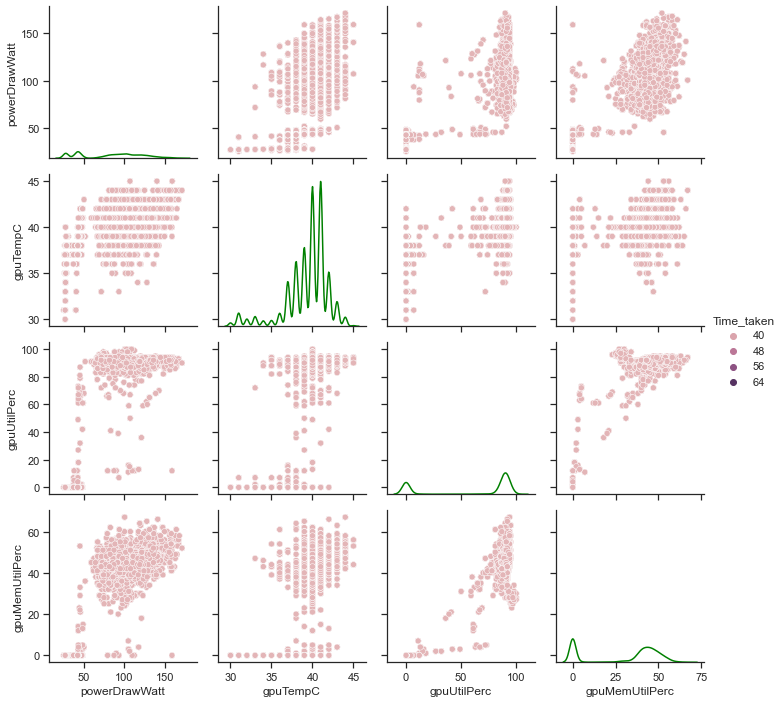

In [99]:
ss_gpu_totalrender2="select gpu.*,ss.eventName,ss.Time_taken from q_start_stop ss INNER JOIN gpu on ss.hostname=gpu.hostname where ss.eventName='TotalRender' and gpu.hostname='0745914f4de046078517041d70b22fe7000005';"
ss_gpu_totalrender2=pysqldf(ss_gpu_totalrender2)

g = sns.PairGrid(ss_gpu_totalrender2,vars=["powerDrawWatt","gpuTempC","gpuUtilPerc","gpuMemUtilPerc"], hue="Time_taken")
g.map_diag(sns.kdeplot, hue=None, color="green")
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()

In [152]:
# checkpoint and gpu merge for 1 particular hostname
ss_gpu="select gpu.*,ss.eventName,ss.Time_taken from q_start_stop ss INNER JOIN gpu on ss.hostname=gpu.hostname where gpu.hostname='4ad946d4435c42dabb5073531ea4f315000001';"
ss_gpu=pysqldf(ss_gpu)
ss_gpu

,timestamp,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc,eventName,Time_taken
0,2018-11-08 07:41:26.762000,4ad946d4435c42dabb5073531ea4f315000001,325217085205,GPU-1c7e75cc-d95a-2ef1-3044-b31669334f46,26.60,28,0,0,Render,45.752
1,2018-11-08 07:41:26.778000,4ad946d4435c42dabb5073531ea4f315000001,325217085205,GPU-1c7e75cc-d95a-2ef1-3044-b31669334f46,26.51,28,0,0,Render,45.752
2,2018-11-08 07:41:28.779000,4ad946d4435c42dabb5073531ea4f315000001,325217085205,GPU-1c7e75cc-d95a-2ef1-3044-b31669334f46,26.60,28,0,0,Render,45.752
3,2018-11-08 07:41:28.798000,4ad946d4435c42dabb5073531ea4f315000001,325217085205,GPU-1c7e75cc-d95a-2ef1-3044-b31669334f46,26.61,28,0,0,Render,45.752
4,2018-11-08 07:41:30.796000,4ad946d4435c42dabb5073531ea4f315000001,325217085205,GPU-1c7e75cc-d95a-2ef1-3044-b31669334f46,26.60,28,0,0,Render,45.752
...,...,...,...,...,...,...,...,...,...,...
945625,2018-11-08 08:31:49.234000,4ad946d4435c42dabb5073531ea4f315000001,325217085205,GPU-1c7e75cc-d95a-2ef1-3044-b31669334f46,26.70,28,0,0,Uploading,1.019
945626,2018-11-08 08:31:51.051000,4ad946d4435c42dabb5073531ea4f315000001,325217085205,GPU-1c7e75cc-d95a-2ef1-3044-b31669334f46,26.70,28,0,0,Uploading,1.019
945627,2018-11-08 08:31:51.251000,4ad946d4435c42dabb5073531ea4f315000001,325217085205,GPU-1c7e75cc-d95a-2ef1-3044-b31669334f46,26.71,28,0,0,Uploading,1.019
945628,2018-11-08 08:31:53.067000,4ad946d4435c42dabb5073531ea4f315000001,325217085205,GPU-1c7e75cc-d95a-2ef1-3044-b31669334f46,26.60,28,0,0,Uploading,1.019


In [109]:
ss_gpu.drop_duplicates()
ss_gpu

,timestamp,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc,eventName,Time_taken
0,2018-11-08T07:41:26.762Z,4ad946d4435c42dabb5073531ea4f315000001,325217085205,GPU-1c7e75cc-d95a-2ef1-3044-b31669334f46,26.60,28,0,0,Render,45.752
1,2018-11-08T07:41:26.778Z,4ad946d4435c42dabb5073531ea4f315000001,325217085205,GPU-1c7e75cc-d95a-2ef1-3044-b31669334f46,26.51,28,0,0,Render,45.752
2,2018-11-08T07:41:28.779Z,4ad946d4435c42dabb5073531ea4f315000001,325217085205,GPU-1c7e75cc-d95a-2ef1-3044-b31669334f46,26.60,28,0,0,Render,45.752
3,2018-11-08T07:41:28.798Z,4ad946d4435c42dabb5073531ea4f315000001,325217085205,GPU-1c7e75cc-d95a-2ef1-3044-b31669334f46,26.61,28,0,0,Render,45.752
4,2018-11-08T07:41:30.796Z,4ad946d4435c42dabb5073531ea4f315000001,325217085205,GPU-1c7e75cc-d95a-2ef1-3044-b31669334f46,26.60,28,0,0,Render,45.752
...,...,...,...,...,...,...,...,...,...,...
945625,2018-11-08T08:31:49.234Z,4ad946d4435c42dabb5073531ea4f315000001,325217085205,GPU-1c7e75cc-d95a-2ef1-3044-b31669334f46,26.70,28,0,0,Uploading,1.019
945626,2018-11-08T08:31:51.051Z,4ad946d4435c42dabb5073531ea4f315000001,325217085205,GPU-1c7e75cc-d95a-2ef1-3044-b31669334f46,26.70,28,0,0,Uploading,1.019
945627,2018-11-08T08:31:51.251Z,4ad946d4435c42dabb5073531ea4f315000001,325217085205,GPU-1c7e75cc-d95a-2ef1-3044-b31669334f46,26.71,28,0,0,Uploading,1.019
945628,2018-11-08T08:31:53.067Z,4ad946d4435c42dabb5073531ea4f315000001,325217085205,GPU-1c7e75cc-d95a-2ef1-3044-b31669334f46,26.60,28,0,0,Uploading,1.019


In [153]:
query="select hostname,AVG(powerDrawWatt) as avg_power from gpu group by hostname;"
query=pysqldf(query)
query

,hostname,avg_power
0,04dc4e9647154250beeee51b866b0715000000,95.868947
1,04dc4e9647154250beeee51b866b0715000001,91.813693
2,04dc4e9647154250beeee51b866b0715000002,82.537798
3,04dc4e9647154250beeee51b866b0715000003,86.558581
4,04dc4e9647154250beeee51b866b0715000004,94.292392
...,...,...
1019,e7adc42d28814e518e9601ac2329c513000019,89.386562
1020,e7adc42d28814e518e9601ac2329c51300001A,82.943504
1021,e7adc42d28814e518e9601ac2329c51300001B,88.354997
1022,e7adc42d28814e518e9601ac2329c51300001C,88.411319


In [154]:
query=query.sort_values(by=['avg_power'],ascending=False).head(10)
query

,hostname,avg_power
687,a77ef58b13ad4c01b769dac8409af3f800000D,106.247462
904,db871cd77a544e13bc791a64a0c8ed5000000U,101.974324
37,04dc4e9647154250beeee51b866b0715000011,101.549633
441,5903af3699134795af7eafc605ae5fc700000H,99.057575
616,8b6a0eebc87b4cb2b0539e81075191b9000016,98.698678
44,04dc4e9647154250beeee51b866b0715000018,98.250353
357,4ad946d4435c42dabb5073531ea4f31500000X,98.150566
537,83ea61ac1ef54f27a3bf7bd0f41ecaa700000D,97.795836
412,4c72fae95b9147189a0559269a6953ff000012,97.771817
57,0745914f4de046078517041d70b22fe7000007,97.535805


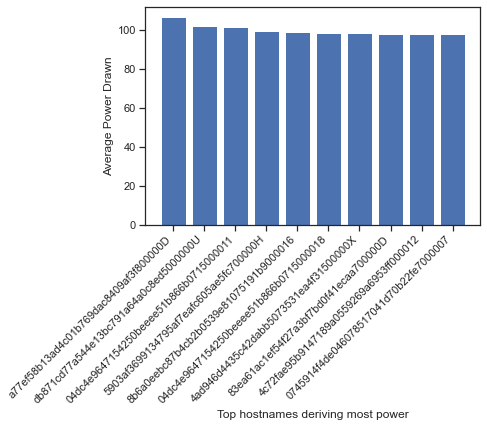

In [155]:
plt.bar(query['hostname'],query['avg_power'])
plt.xlabel("Top hostnames deriving most power")
plt.ylabel("Average Power Drawn")
plt.xticks(rotation=45, ha='right')
plt.show()

In [120]:
q_start_stop[q_start_stop['hostname']=='a77ef58b13ad4c01b769dac8409af3f800000D']

,hostname,taskId,jobId,eventName,Start,Start_Time,Stop,Stop_Time,Time_taken
3752,a77ef58b13ad4c01b769dac8409af3f800000D,6d4ab993-2446-4314-840c-6df0ac2ccdff,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Render,START,2018-11-08 07:45:44.016,STOP,2018-11-08 07:46:29.001,44.985
7722,a77ef58b13ad4c01b769dac8409af3f800000D,c157089d-cc79-4a1f-b7d5-1521fa1e15e0,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Render,START,2018-11-08 08:27:23.956,STOP,2018-11-08 08:28:12.979,49.023
8525,a77ef58b13ad4c01b769dac8409af3f800000D,603dad80-d3fd-490b-a708-37e2003f1ae6,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Render,START,2018-11-08 08:09:34.336,STOP,2018-11-08 08:10:17.192,42.856
8604,a77ef58b13ad4c01b769dac8409af3f800000D,59372076-85ee-4904-b8b0-13a8c13a70a1,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Render,START,2018-11-08 08:10:21.549,STOP,2018-11-08 08:11:10.953,49.404
9463,a77ef58b13ad4c01b769dac8409af3f800000D,1b9236d5-5720-4ee6-ba1b-42887edb78e0,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Render,START,2018-11-08 08:12:06.170,STOP,2018-11-08 08:12:47.762,41.592
...,...,...,...,...,...,...,...,...,...
324661,a77ef58b13ad4c01b769dac8409af3f800000D,333ff5c8-5409-4e9e-8969-ddca3299b956,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Uploading,START,2018-11-08 07:50:28.704,STOP,2018-11-08 07:50:29.784,1.080
326589,a77ef58b13ad4c01b769dac8409af3f800000D,e92812f5-f414-49fa-a557-69a61f40bc45,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Uploading,START,2018-11-08 08:07:52.253,STOP,2018-11-08 08:07:53.179,0.926
326798,a77ef58b13ad4c01b769dac8409af3f800000D,70a71e87-aa16-4a20-bde9-ca7eeeffcd97,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Uploading,START,2018-11-08 08:21:38.515,STOP,2018-11-08 08:21:39.400,0.885
330280,a77ef58b13ad4c01b769dac8409af3f800000D,72836587-431e-4a6a-85d8-dbe025798855,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Uploading,START,2018-11-08 08:18:44.486,STOP,2018-11-08 08:18:45.561,1.075


In [228]:
eventVSgpu="select g.*,ss.eventName,ss.Time_taken from q_start_stop ss INNER JOIN gpu g on ss.hostname=g.hostname where ss.hostname IN (select hostname from query) and ss.Start_Time<=g.timestamp and ss.Stop_Time>=g.timestamp;"
eventVSgpu=pysqldf(eventVSgpu)
eventVSgpu

,timestamp,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc,eventName,Time_taken
0,2018-11-08 07:41:32.960000,4ad946d4435c42dabb5073531ea4f31500000X,320118119710,GPU-bf2d15ed-ed8b-dd41-71d7-11f73b27719b,28.64,28,0,0,Render,44.799
1,2018-11-08 07:41:34.978000,4ad946d4435c42dabb5073531ea4f31500000X,320118119710,GPU-bf2d15ed-ed8b-dd41-71d7-11f73b27719b,28.63,28,0,0,Render,44.799
2,2018-11-08 07:41:36.995000,4ad946d4435c42dabb5073531ea4f31500000X,320118119710,GPU-bf2d15ed-ed8b-dd41-71d7-11f73b27719b,42.67,29,0,0,Render,44.799
3,2018-11-08 07:41:39.011000,4ad946d4435c42dabb5073531ea4f31500000X,320118119710,GPU-bf2d15ed-ed8b-dd41-71d7-11f73b27719b,131.96,31,67,41,Render,44.799
4,2018-11-08 07:41:41.028000,4ad946d4435c42dabb5073531ea4f31500000X,320118119710,GPU-bf2d15ed-ed8b-dd41-71d7-11f73b27719b,120.09,33,91,47,Render,44.799
...,...,...,...,...,...,...,...,...,...,...
27495,2018-11-08 08:16:31.340000,83ea61ac1ef54f27a3bf7bd0f41ecaa700000D,323617042624,GPU-3c70c815-37f7-30cd-5aae-028b84687738,54.42,43,0,0,Uploading,1.185
27496,2018-11-08 08:17:23.416000,4c72fae95b9147189a0559269a6953ff000012,325217084671,GPU-5bb7cd24-69b4-199a-2b0f-2d36b39a37c2,47.24,46,0,0,Uploading,1.021
27497,2018-11-08 08:27:52.110000,db871cd77a544e13bc791a64a0c8ed5000000U,323617021202,GPU-a69f6567-f08c-9c67-06a3-eab81fe834d2,44.38,40,0,0,Uploading,1.248
27498,2018-11-08 08:28:19.013000,4c72fae95b9147189a0559269a6953ff000012,325217084671,GPU-5bb7cd24-69b4-199a-2b0f-2d36b39a37c2,53.25,48,0,0,Uploading,1.075


In [229]:
eventVSgpu['eventName'].value_counts()

TotalRender    13603
Render         13184
Uploading        419
Tiling           294
Name: eventName, dtype: int64

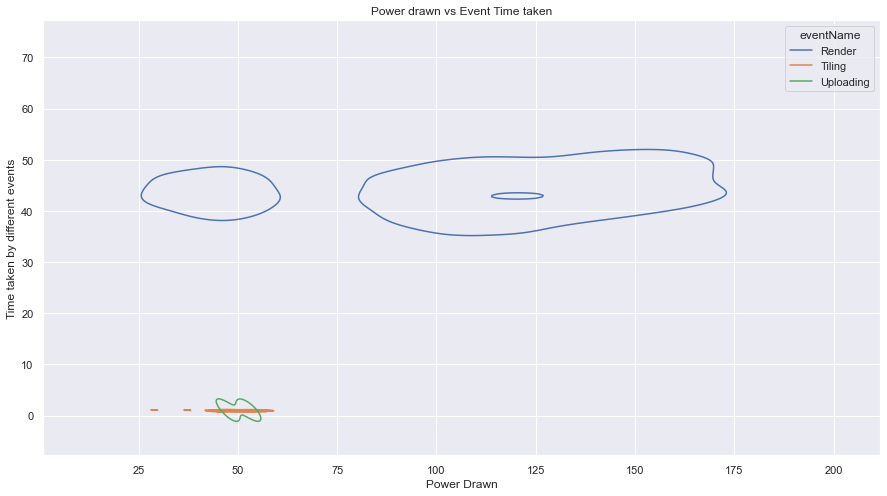

In [232]:
sns.kdeplot(data=eventVSgpu[eventVSgpu['eventName']!="TotalRender"], x="powerDrawWatt", y="Time_taken", hue="eventName")
plt.title('Power drawn vs Event Time taken')
plt.xlabel('Power Drawn')
plt.ylabel('Time taken by different events')
plt.show()

<AxesSubplot:xlabel='powerDrawWatt', ylabel='gpuTempC'>

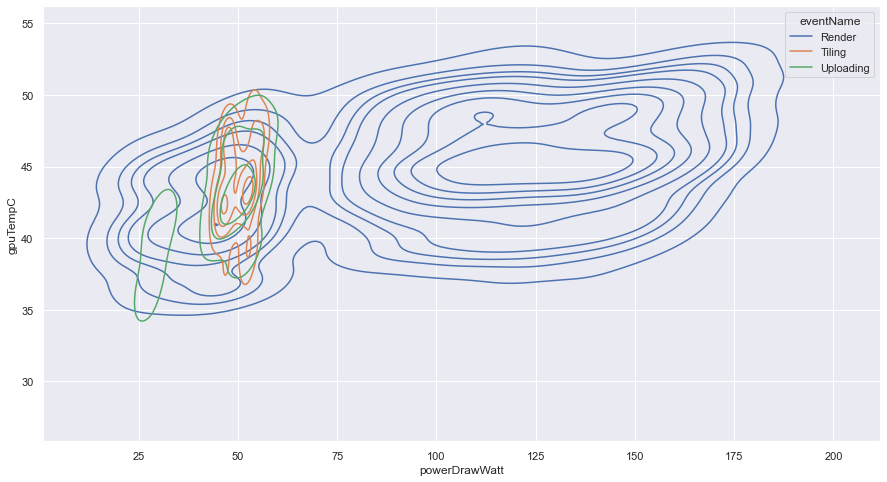

In [234]:
sns.kdeplot(data=eventVSgpu[eventVSgpu['eventName']!="TotalRender"], x="powerDrawWatt", y="gpuTempC",hue="eventName")

In [235]:
avgpower_eventtime="select AVG(powerDrawWatt),eventName from eventVSgpu where eventName not like '%TotalRender%' group by eventName;"
avgpower_eventtime=pysqldf(avgpower_eventtime)
avgpower_eventtime

,AVG(powerDrawWatt),eventName
0,108.204798,Render
1,50.078061,Tiling
2,45.704105,Uploading


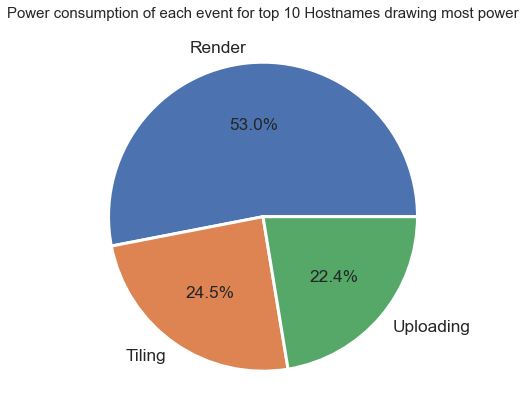

In [236]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(avgpower_eventtime['AVG(powerDrawWatt)'], labels=avgpower_rendertime['eventName'], autopct='%.1f%%',
       wedgeprops={'linewidth': 3.0, 'edgecolor': 'w'},
       textprops={'size': 'x-large'})
ax.set_title('Power consumption of each event for top 10 Hostnames drawing most power', fontsize=15)
plt.tight_layout()

In [186]:
eventVSgpu.sort_values(by=['gpuTempC'],ascending=False).head(20)

,timestamp,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc,eventName,Time_taken
6467,2018-11-08 07:58:30.632000,04dc4e9647154250beeee51b866b0715000011,323217056368,GPU-a906c711-24a4-24b5-0261-3babb6dec5e9,124.27,54,94,47,Render,65.523
6465,2018-11-08 07:58:26.598000,04dc4e9647154250beeee51b866b0715000011,323217056368,GPU-a906c711-24a4-24b5-0261-3babb6dec5e9,164.41,54,97,55,Render,65.523
6468,2018-11-08 07:58:32.648000,04dc4e9647154250beeee51b866b0715000011,323217056368,GPU-a906c711-24a4-24b5-0261-3babb6dec5e9,129.90,54,96,52,Render,65.523
6469,2018-11-08 07:58:34.666000,04dc4e9647154250beeee51b866b0715000011,323217056368,GPU-a906c711-24a4-24b5-0261-3babb6dec5e9,157.60,54,91,42,Render,65.523
6837,2018-11-08 08:11:26.080000,04dc4e9647154250beeee51b866b0715000011,323217056368,GPU-a906c711-24a4-24b5-0261-3babb6dec5e9,124.06,54,94,59,Render,51.230
6466,2018-11-08 07:58:28.614000,04dc4e9647154250beeee51b866b0715000011,323217056368,GPU-a906c711-24a4-24b5-0261-3babb6dec5e9,147.26,54,94,39,Render,65.523
6836,2018-11-08 08:11:24.063000,04dc4e9647154250beeee51b866b0715000011,323217056368,GPU-a906c711-24a4-24b5-0261-3babb6dec5e9,173.57,53,96,54,Render,51.230
4407,2018-11-08 08:19:24.446000,4c72fae95b9147189a0559269a6953ff000012,325217084671,GPU-5bb7cd24-69b4-199a-2b0f-2d36b39a37c2,169.94,53,90,50,Render,44.079
4406,2018-11-08 08:19:22.430000,4c72fae95b9147189a0559269a6953ff000012,325217084671,GPU-5bb7cd24-69b4-199a-2b0f-2d36b39a37c2,175.02,53,92,54,Render,44.079
4258,2018-11-08 08:11:22.309000,4c72fae95b9147189a0559269a6953ff000012,325217084671,GPU-5bb7cd24-69b4-199a-2b0f-2d36b39a37c2,133.97,53,89,48,Render,44.883


<AxesSubplot:xlabel='eventName', ylabel='gpuTempC'>

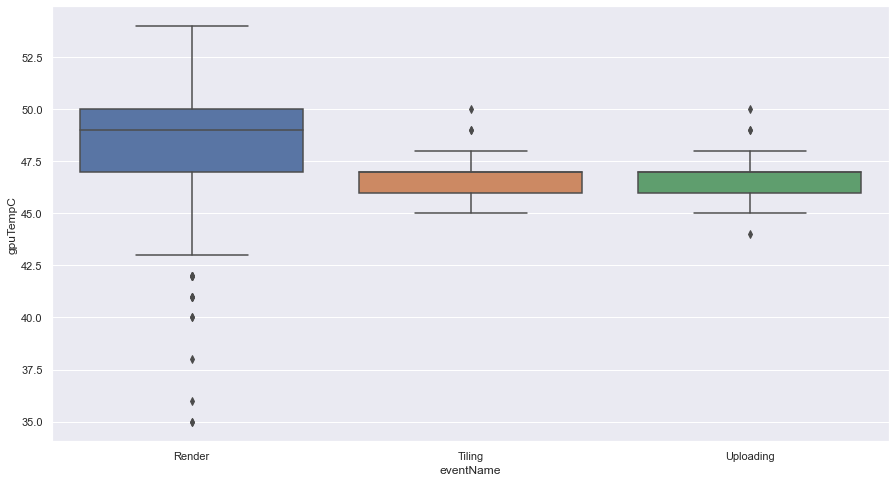

In [238]:
difrnt_event=eventVSgpu[eventVSgpu['eventName']!="TotalRender"]
sns.boxplot(data=difrnt_event[difrnt_event['gpuSerial']==323217056368], x="eventName", y="gpuTempC")

In [239]:
toptemp_gpu="select gpuSerial,eventName,Avg(gpuTempC) as avg_temp from eventVSgpu where eventName not like "%TotalRender%" group by gpuSerial,eventName;"
toptemp_gpu=pysqldf(toptemp_gpu)
toptemp_gpu

NameError: name 'TotalRender' is not defined

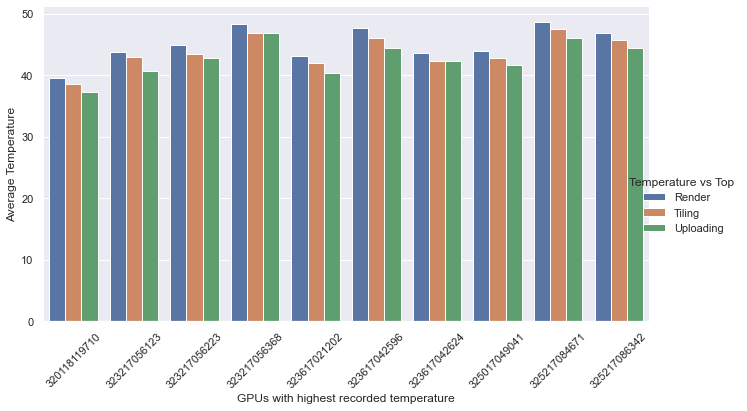

In [223]:

g = sns.catplot(
    data=toptemp_gpu, kind="bar",
    x="gpuSerial", y="avg_temp", hue="eventName",aspect=15/8.27
)
g.set_xticklabels(rotation=45)
g.set_axis_labels("GPUs with highest recorded temperature", "Average Temperature")
g.legend.set_title("Temperature vs Top ")

In [240]:
gpu_speed_totalrender="select gpuSerial,eventName,AVG(Time_taken) as avg_time  from eventVSgpu where eventName like '%TotalRender%' group by gpuSerial order by avg_time desc;"
gpu_speed_totalrender=pysqldf(gpu_speed_totalrender)
gpu_speed_totalrender

,gpuSerial,eventName,avg_time
0,323617021202,TotalRender,47.394788
1,323617042596,TotalRender,46.955827
2,323217056123,TotalRender,46.829567
3,323217056368,TotalRender,46.134329
4,323217056223,TotalRender,45.997412
5,325017049041,TotalRender,45.489765
6,320118119710,TotalRender,45.183658
7,325217084671,TotalRender,42.307426
8,325217086342,TotalRender,41.675820
9,323617042624,TotalRender,41.160521


In [248]:
gpu_speed_totalrender['gpuSerial']=gpu_speed_totalrender['gpuSerial'].astype(str)

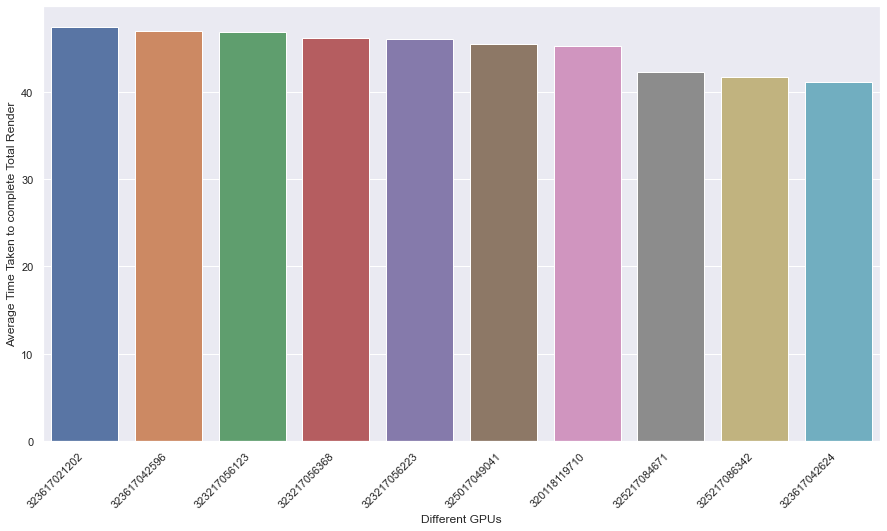

In [249]:
#plt.bar(gpu_speed_totalrender[''],gpu_speed_totalrender['avg_time'],color='hotpink')
sns.barplot(data=gpu_speed_totalrender, x="gpuSerial", y="avg_time")
plt.xlabel("Different GPUs")
plt.ylabel("Average Time Taken to complete Total Render")
plt.xticks(rotation=45, ha='right')
plt.show()